# Visualizing Titanic Data

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [2]:
# first, need our imports and to grab the data
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.read_csv('data/titanic.csv')

In [4]:
# what's in the data?
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [6]:
# Need to grab last names ... but how?
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [7]:
# for loop method
ln_list = []
for row in df.index:
    ln = df['Name'].str.split(", ")[row][0]
    ln_list.append(ln)
pd.Series(ln_list)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Length: 891, dtype: object

In [8]:
# string method
df['Name'].str.split(", ").str[0]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [9]:
# list comprehension method
pd.Series(name[0] for name in df['Name'].str.split(", "))

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Length: 891, dtype: object

In [10]:
# lambda method
df['Name'].map(lambda x: x.split(", ")[0])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [11]:
df['Last Name'] = df['Name'].map(lambda x: x.split(", ")[0])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


`groupby` or `value_counts`?

In [13]:
# how to get groupby to work on this
df[['PassengerId', 'Last Name']].groupby(by='Last Name').count().sort_values(by='PassengerId', ascending=False).head()

,PassengerId
Last Name,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6


In [14]:
# or, use value counts
df['Last Name'].value_counts().head(10)

Andersson    9
Sage         7
Carter       6
Goodwin      6
Panula       6
Johnson      6
Skoog        6
Rice         5
Smith        4
Kelly        4
Name: Last Name, dtype: int64

In [15]:
most_common_ln = df['Last Name'].value_counts().head(8)

Now let's visualize:

In [16]:
most_common_ln

Andersson    9
Sage         7
Carter       6
Goodwin      6
Panula       6
Johnson      6
Skoog        6
Rice         5
Name: Last Name, dtype: int64

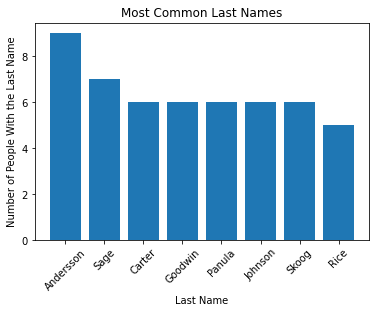

In [17]:
# Plot a bar graph of the most common last names
plt.bar(most_common_ln.index, most_common_ln)
plt.title('Most Common Last Names')
plt.ylabel('Number of People With the Last Name')
plt.xlabel('Last Name')
plt.xticks(rotation=45)
plt.show()

### Make it Pop!

In [18]:
num_passengers = len(df)

In [24]:
common_ln = pd.DataFrame(most_common_ln)

,Last Name
Andersson,9
Sage,7
Carter,6
Goodwin,6
Panula,6
Johnson,6
Skoog,6
Rice,5


In [40]:
common_ln['Proportion of Passengers'] = common_ln['Last Name']/num_passengers

In [41]:
common_ln

,Last Name,Percentage of Passengers,Proportion of Passengers
Andersson,9,0.010101,0.010101
Sage,7,0.007856,0.007856
Carter,6,0.006734,0.006734
Goodwin,6,0.006734,0.006734
Panula,6,0.006734,0.006734
Johnson,6,0.006734,0.006734
Skoog,6,0.006734,0.006734
Rice,5,0.005612,0.005612


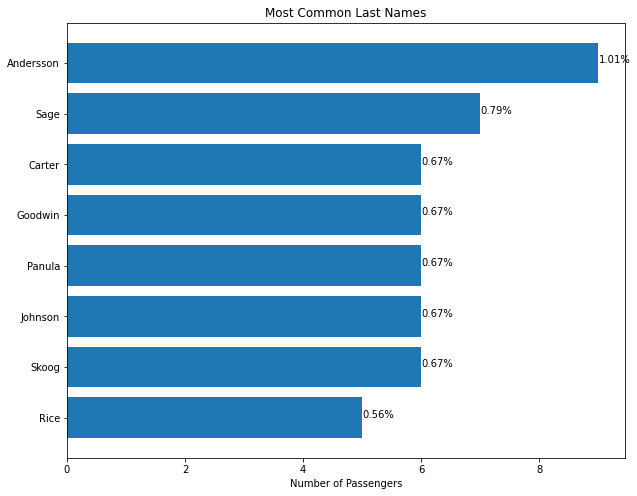

In [42]:
plt.figure(figsize=(10,8))

# stacked horizonal bar charts
plt.barh(common_ln.index, common_ln['Last Name'])

# grabbing the current axis to format and annotate later
ax = plt.gca()

#inverting y axis so it shows in size order
ax.invert_yaxis()

# # This tricky bit of code annotates percentages on the chart
y = 0 # our start point on our y axis for the details
# Doing this for each last name
for row in common_ln.index:
    # grabbing the last name
    x = common_ln['Last Name'][row]
    # grabbing the percentage of the passengers with that last name
    ln_perc = common_ln['Proportion of Passengers'][row] * 100
    # formatting with f-strings for readability
    percentage = f'{ln_perc:,.2f}%' 
    # annotating the chart, locating the annotation at the name and our y height
    ax.annotate(percentage,(x, y))
    # adding 1 to our y for the next name
    y += 1

plt.title("Most Common Last Names")
plt.xlabel("Number of Passengers")
plt.show()

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [43]:
max_fare = df['Fare'].max()

In [45]:
df.loc[df['Fare'] == max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer


In [44]:
df.sort_values(by='Fare', ascending = False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune


And let's visualize some more!

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

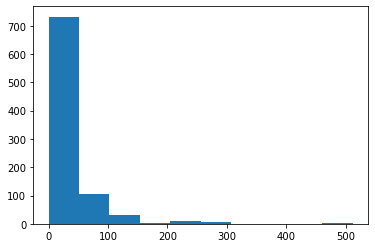

In [46]:
# Plot a histogram - but now, let's do all fares
plt.hist(df['Fare'])

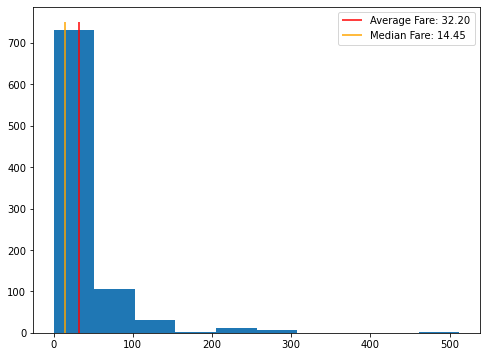

In [50]:
# Okay that's pretty bland, let's see if we can add more detail
plt.figure(figsize=(8,6))
plt.hist(df['Fare'])
plt.vlines(df['Fare'].mean(),0, 750, label=f'Average Fare: {df["Fare"].mean():.2f}', color='red')
plt.vlines(df['Fare'].median(),0, 750, label=f"Median Fare: {df['Fare'].median():.2f}", color='orange')
plt.legend()
plt.show()

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [51]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

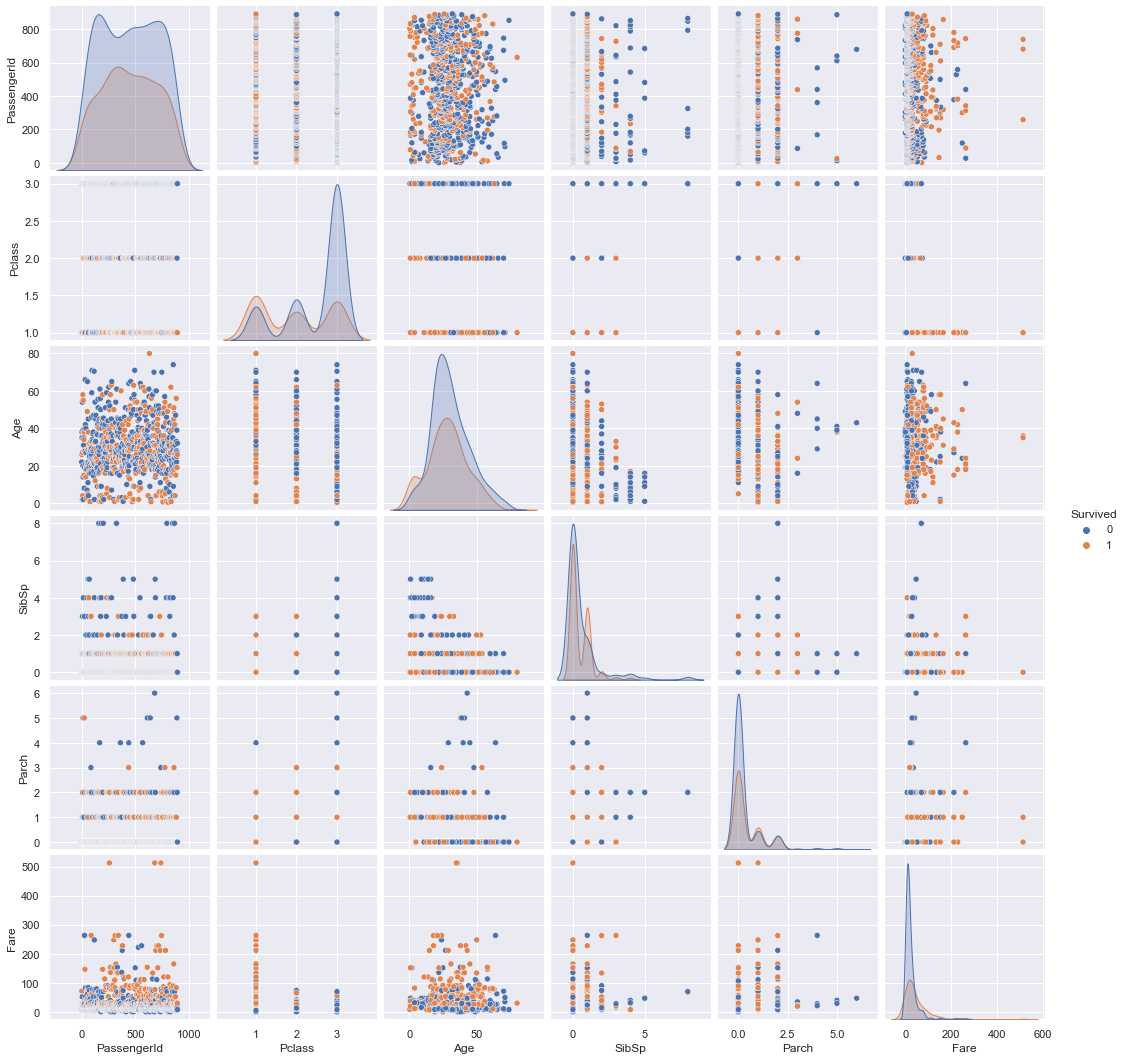

In [52]:
# Let's take a look at how these columns overlap
sns.pairplot(df, hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

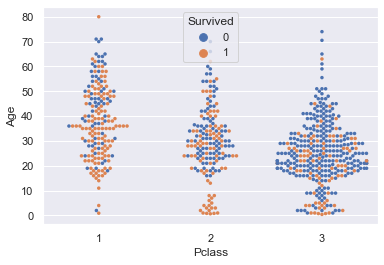

In [57]:
# Try out a swarm plot with class and age
sns.swarmplot(x='Pclass', y='Age', data=df, 
              hue='Survived', size=3.5)

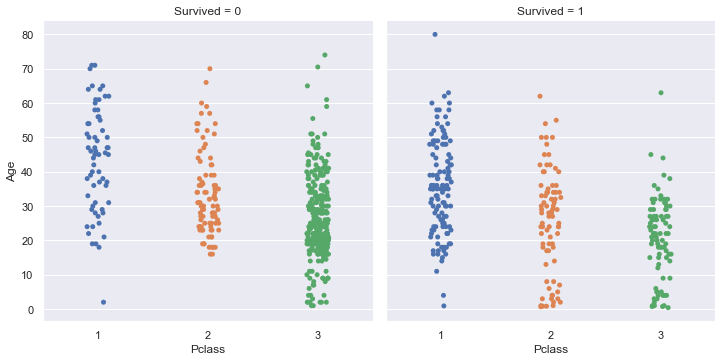

In [59]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
sns.catplot(x='Pclass', y='Age', data=df, col='Survived')

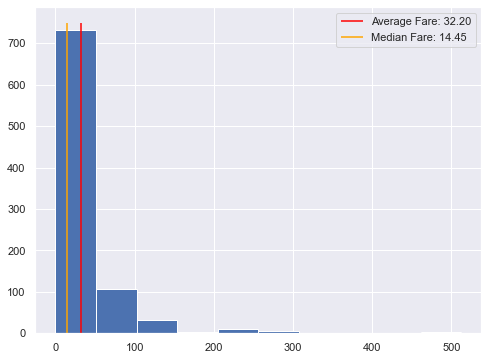

In [60]:
# Also, now that we've set the style for our plots, 
# let's see what a previous matplotlib plot looks like

plt.figure(figsize=(8,6))
plt.hist(df['Fare'])
plt.vlines(df['Fare'].mean(),0, 750, label=f'Average Fare: {df["Fare"].mean():.2f}', color='red')
plt.vlines(df['Fare'].median(),0, 750, label=f"Median Fare: {df['Fare'].median():.2f}", color='orange')
plt.legend()
plt.show()

## If we have time...

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [63]:
# plotly
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 hover_name="country", size_max=60)
fig.show()

In [67]:
# folium
import folium

m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup="The Waterfront",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

m

## Resources

### Other Python Libraries:

- [Plotly Express in Python](https://plotly.com/python/plotly-express/)
    - please note, not all Plotly visualizations are as easy as plotly express, but have fun exploring
- [Folium](https://python-visualization.github.io/folium/quickstart.html)
    - used to be restricted as to how many rows would work well, but I've heard it's gotten better at handling bigger data

### Resources from the slides:

- Visualization Types/examples (often with example code):
    - https://datavizproject.com/
    - https://python-graph-gallery.com/ 
    - https://seaborn.pydata.org/examples/index.html
- [Python Matplotlib guide (the theory of matplotlib, with examples)](https://realpython.com/python-matplotlib-guide/)
- [The best Seaborn tutorial, through Pokemon stats](https://elitedatascience.com/python-seaborn-tutorial)
- [2010 TED Talk on data visualization from Information is Beautiful](https://www.ted.com/talks/david_mccandless_the_beauty_of_data_visualization)
    - don’t have 20 minutes? check out the last 8, on perspective, [here](https://www.ted.com/talks/david_mccandless_the_beauty_of_data_visualization#t-611279)
